In [117]:
# Library
import pandas as pd

In [118]:
# Population

# Read data
population_df = pd.read_csv('../data/raw/population_2001-23.csv', encoding='ISO-8859-1')

# Data cleaning
population_df = population_df[population_df.iloc[:, 1].isin(['2', 2])] # retain victoria data
# remove unused data
population_df = population_df.iloc[:, [0, 6, 8, 9, 10, 29]]
# add column name
population_df.columns = ['Year', 'SA4 name', 'SA3 name', 'SA2 code', 'SA2 name', 'Total persons']
# change numbers to integers
population_df['SA2 code'] = population_df['SA2 code'].astype(int)
population_df['Total persons'] = population_df['Total persons'].astype(int)


/var/folders/z6/6l5sbbq93f79jfqrtlht_vw40000gn/T/ipykernel_4397/1488416031.py:4: DtypeWarning: Columns (1,5,7,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  population_df = pd.read_csv('../data/raw/population_2001-23.csv', encoding='ISO-8859-1')


In [119]:
print(population_df.iloc[0,])

Year                  2001
SA4 name          Ballarat
SA3 name          Ballarat
SA2 code         201011001
SA2 name         Alfredton
Total persons         5756
Name: 648, dtype: object


In [120]:
# Mesh Blocks

# Read data
mb_df = pd.read_csv('../data/raw/MB_2021.csv', encoding='ISO-8859-1')

# Data cleaning
mb_df = mb_df[mb_df.iloc[:, 13] == 2] # retain victoria data
mb_df = mb_df.iloc[:, [0, 5, 13, 14]]
mb_df_unique = mb_df[['SA2_CODE_2021', 'MB_CODE_2021']].drop_duplicates(subset='SA2_CODE_2021')

# Merge
population_df = population_df.merge(mb_df_unique[['SA2_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='SA2 code', right_on='SA2_CODE_2021', how='left')

population_df.rename(columns={'MB_CODE_2021': 'MB code'}, inplace=True)
population_df.drop(columns=['SA2_CODE_2021'], inplace=True)

/var/folders/z6/6l5sbbq93f79jfqrtlht_vw40000gn/T/ipykernel_4397/4288605387.py:4: DtypeWarning: Columns (0,4,5,7,9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  mb_df = pd.read_csv('../data/raw/MB_2021.csv', encoding='ISO-8859-1')


In [121]:
# Postal Area

# Read data
poa_df = pd.read_csv('../data/raw/POA_2021.csv', encoding='ISO-8859-1')

# Merge
population_df = population_df.merge(poa_df[['POA_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='MB code', right_on='MB_CODE_2021', how='left')
population_df.rename(columns={'POA_CODE_2021': 'Postcode'}, inplace=True)
population_df.drop(columns=['MB_CODE_2021'], inplace=True)

/var/folders/z6/6l5sbbq93f79jfqrtlht_vw40000gn/T/ipykernel_4397/3237202963.py:4: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  poa_df = pd.read_csv('../data/raw/POA_2021.csv', encoding='ISO-8859-1')


In [122]:
print(len(population_df))
print(population_df['Postcode'].isna().sum())
print((population_df['Total persons'] == 0).sum())
population_df = population_df[population_df['Total persons'] != 0] # delet zero number of person
print(len(population_df))
print(population_df.iloc[0,])

12006
0
121
11885
Year                    2001
SA4 name            Ballarat
SA3 name            Ballarat
SA2 code           201011001
SA2 name           Alfredton
Total persons           5756
MB code          20004360000
Postcode                3350
Name: 0, dtype: object


In [123]:
# Change row and column
population_postcode_year_df = population_df.pivot_table(
    index=['SA2 code', 'SA4 name', 'SA3 name', 'SA2 name', 'MB code', 'Postcode'],
    columns='Year',
    values='Total persons'
).reset_index()
population_postcode_year_df.columns.name = None
print(population_postcode_year_df.iloc[0,])

# Combine data with same postcode
population_postcode_year_df = population_postcode_year_df.iloc[:, 5:]
population_postcode_year_merged_df = population_postcode_year_df.groupby('Postcode').sum().reset_index()

population_postcode_year_merged_df = population_postcode_year_merged_df.astype('Int64')


SA2 code      201011001
SA4 name       Ballarat
SA3 name       Ballarat
SA2 name      Alfredton
MB code     20004360000
Postcode           3350
2001             5756.0
2002             6092.0
2003             6293.0
2004             6480.0
2005             6648.0
2006             6761.0
2007             7034.0
2008             7272.0
2009             7614.0
2010             7894.0
2011             8452.0
2012             9060.0
2013             9714.0
2014            10338.0
2015            11039.0
2016            11852.0
2017            12649.0
2018            13537.0
2019            14434.0
2020            15507.0
2021            16841.0
2022            18002.0
2023            18997.0
Name: 0, dtype: object


In [124]:
print(population_postcode_year_merged_df.iloc[0,])
print(len(population_postcode_year_df))
print(len(population_postcode_year_merged_df))

Postcode     3000
2001         7644
2002         9592
2003        11400
2004        12727
2005        14292
2006        15249
2007        16225
2008        17325
2009        18751
2010        20382
2011        21815
2012        24882
2013        29650
2014        33626
2015        37162
2016        40181
2017        44570
2018        47554
2019        49645
2020        50297
2021        43577
2022        46906
2023        54001
Name: 0, dtype: Int64
520
328


In [125]:
# Save data
population_postcode_year_merged_df.to_csv('../data/landing/preprocessed_population_2001-23.csv', index=False)

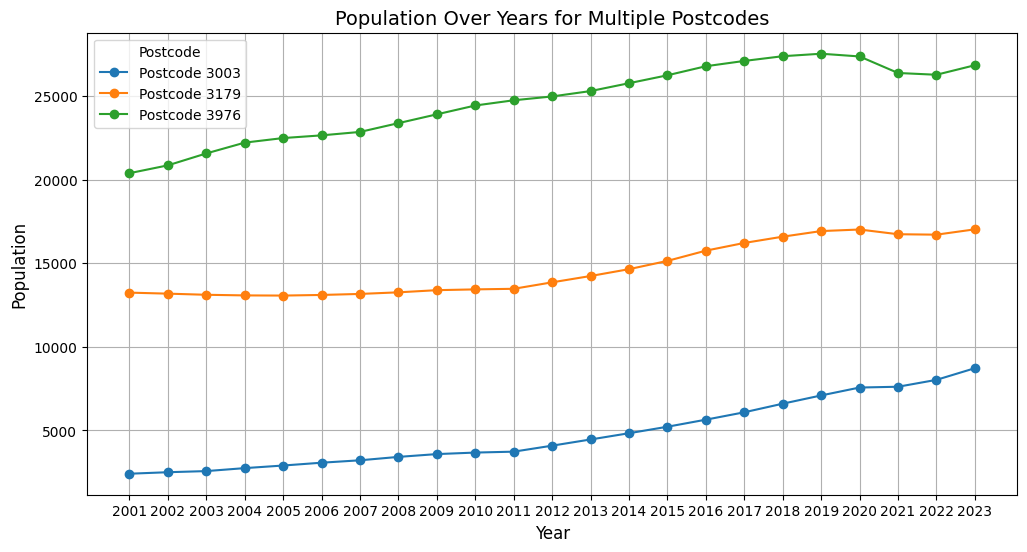

In [126]:
# Visualize population
import matplotlib.pyplot as plt

# read data
preprocessed_population_df = pd.read_csv('../data/landing/preprocessed_population_2001-23.csv', encoding='ISO-8859-1')

# plot
preprocessed_population_df = preprocessed_population_df.set_index('Postcode')
selected_rows = preprocessed_population_df.loc[[3003, 3179, 3976]]

plt.figure(figsize=(12,6))
for postcode, row_data in selected_rows.iterrows():
    plt.plot(row_data.index, row_data.values, marker='o', linestyle='-', label=f'Postcode {postcode}')

plt.title('Population Over Years for Multiple Postcodes', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend(title="Postcode")
plt.grid(True)
plt.show()

In [127]:
# Predict population in 2000, 2024, 2025
import numpy as np
from sklearn.linear_model import LinearRegression

preprocessed_population_df['2000'] = None
preprocessed_population_df['2024'] = None
preprocessed_population_df['2025'] = None

years = list(map(str, range(2001, 2024)))
training_years = list(map(str, range(2001, 2023)))

for postcode, row_data in preprocessed_population_df.iterrows():
    if all(year in row_data.index for year in training_years):

        X = pd.DataFrame(training_years)
        # log data
        y = row_data[training_years].values.astype(float)
        y[y <= 0] = 0.01
        y_log = np.log(y)
        
        model = LinearRegression()
        model.fit(X, y_log)
        
        population_2000 = round(np.exp(model.predict([[2000]])[0]))
        population_2024 = round(np.exp(model.predict([[2024]])[0]))
        population_2025 = round(np.exp(model.predict([[2025]])[0]))
        
        preprocessed_population_df.at[postcode, '2000'] = population_2000
        preprocessed_population_df.at[postcode, '2024'] = population_2024
        preprocessed_population_df.at[postcode, '2025'] = population_2025

col_2000 = preprocessed_population_df.pop('2000')
preprocessed_population_df.insert(0, '2000', col_2000)

preprocessed_population_df = preprocessed_population_df.reset_index()

In [128]:
# Save data
preprocessed_population_df.to_csv('../data/landing/population_2000-25.csv', index=False)

Postcode     3000
2000         8600
2001         7644
2002         9592
2003        11400
2004        12727
2005        14292
2006        15249
2007        16225
2008        17325
2009        18751
2010        20382
2011        21815
2012        24882
2013        29650
2014        33626
2015        37162
2016        40181
2017        44570
2018        47554
2019        49645
2020        50297
2021        43577
2022        46906
2023        54001
2024        72801
2025        79577
Name: 0, dtype: object


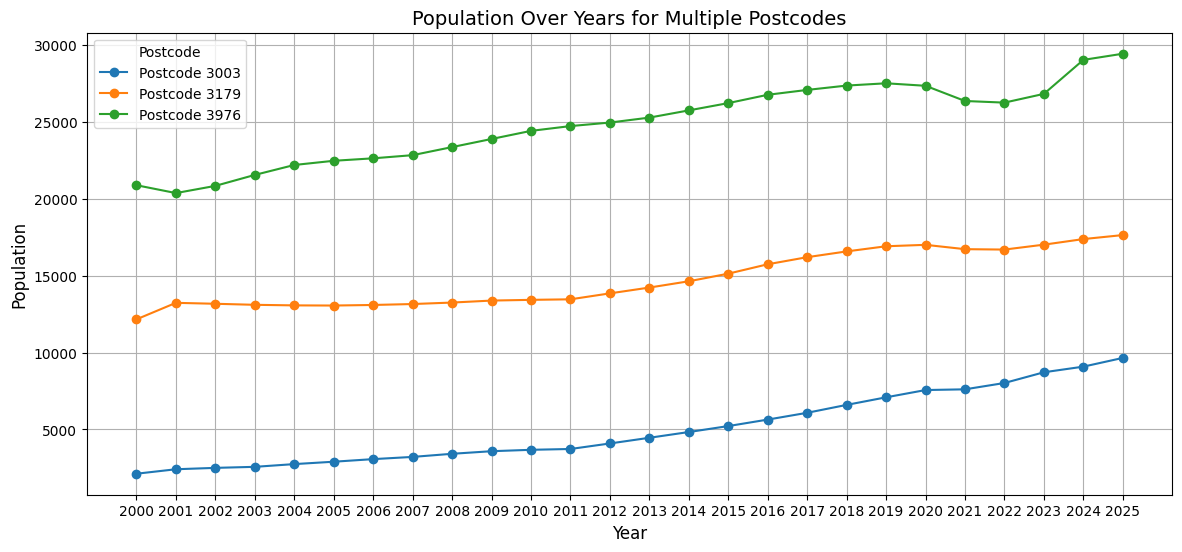

In [129]:
# Check prediction
print(preprocessed_population_df.iloc[0,])

# plot
preprocessed_population_df = preprocessed_population_df.set_index('Postcode')
selected_rows = preprocessed_population_df.loc[[3003, 3179, 3976]]

plt.figure(figsize=(14,6))
for postcode, row_data in selected_rows.iterrows():
    plt.plot(row_data.index, row_data.values, marker='o', linestyle='-', label=f'Postcode {postcode}')

plt.title('Population Over Years for Multiple Postcodes', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend(title="Postcode")
plt.grid(True)
plt.show()